In [23]:
import glob 
import random 
files = glob.glob('flow_split/*.csv')

f = 'flow_split/161.csv' #random.choice(files)
f = open(f, 'r')

edges = set()
line = f.readline()
while line: 
    _,src,sp,dst,dp,usr,img,label = line.split(',')
    if int(sp) > int(dp):
        edges.add((src,dst))
    else: 
        edges.add((dst,src))
    
    #edges.add((usr,src))

    line = f.readline()
    
f.close()

2382


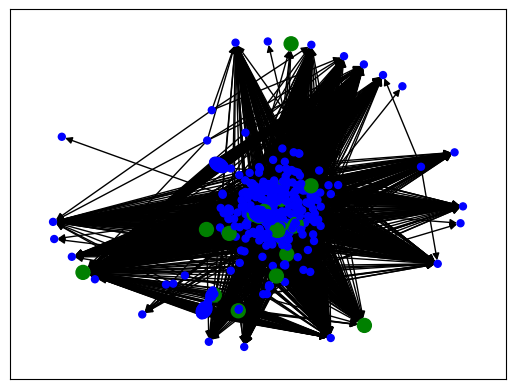

In [24]:
import networkx as nx
nodes = list(set([a[0] for a in edges]).union(set([a[1] for a in edges])))

print(len(edges))
labels = []
sizes = []
for n in nodes:
    if n.isnumeric():
        labels.append('green')
    else: 
        if n.startswith('Sys'):
            labels.append('blue')
            sizes.append(25)
        elif n == 'DC1': 
            labels.append('green')
            sizes.append(100)
        elif n.startswith('142'): 
            labels.append('green')
            sizes.append(100)
        else: 
            labels.append('red')
            print(n)
            sizes.append(100)
    
g = nx.DiGraph(list(edges))
layout = nx.drawing.spring_layout(g, k=0.5, iterations=250)
nx.draw_networkx_nodes(g, layout, node_color=labels, node_size=sizes)
nx.draw_networkx_edges(g, layout, node_size=sizes)
pass 